In [7]:
import numpy as np
import matplotlib.pyplot as plt
import roboticstoolbox as rtb
from spatialmath import SE3
from math import pi

# ==========================================
# 1. SETUP ROBOT
# ==========================================
L1 = rtb.RevoluteMDH(alpha=0.0,    a=0.0,  d=0.2,  offset=0.0)
L2 = rtb.RevoluteMDH(alpha=pi/2,   a=0.0,  d=0.02, offset=0.0)
L3 = rtb.RevoluteMDH(alpha=0.0,    a=0.25, d=0.0,  offset=0.0)

tool_frame = SE3.Tx(0.28)
robot = rtb.DHRobot([L1, L2, L3], tool=tool_frame, name="Student_Robot")

# ==========================================
# 2. GENERATE WORKSPACE
# ==========================================
print("Calculating Workspace... (Please wait)")

# ใช้ Resolution กลางๆ (20) กำลังดี ไม่ช้าไป
n_steps = 20
q1_range = np.linspace(-pi, pi, n_steps)
q2_range = np.linspace(-pi/2, pi/2, n_steps)
q3_range = np.linspace(-pi, pi, n_steps)

points_list = []

for q1 in q1_range:
    for q2 in q2_range:
        for q3 in q3_range:
            T = robot.fkine([q1, q2, q3])
            points_list.append(T.t)

data = np.array(points_list)






Calculating Workspace... (Please wait)


Text(0.5, 0, 'Z (m)')

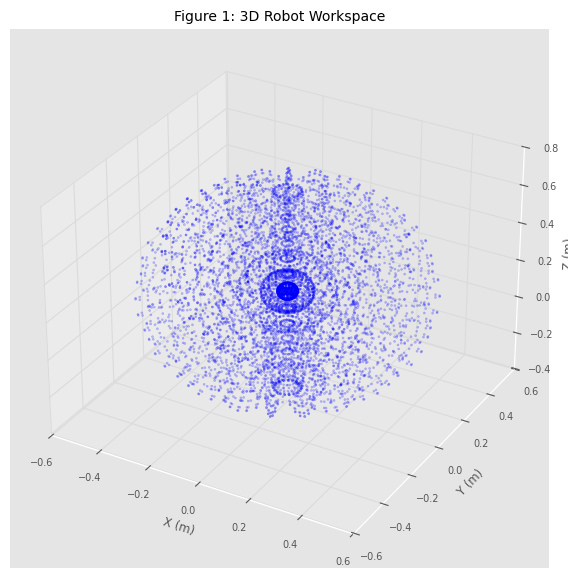

In [8]:
# ==========================================
# 3. PLOT FIGURE 1: 3D WORKSPACE
# ==========================================
fig1 = plt.figure(figsize=(10, 7))
ax = fig1.add_subplot(111, projection='3d')

# พล็อตจุด 3 มิติ
ax.scatter(data[:,0], data[:,1], data[:,2], c='b', s=2, alpha=0.2)
ax.set_title("Figure 1: 3D Robot Workspace")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")

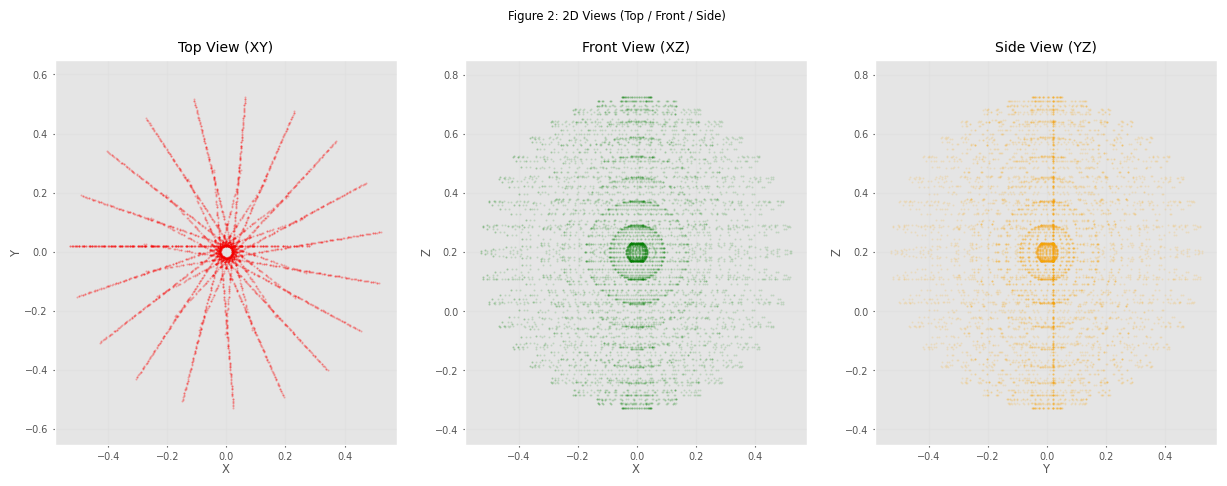

In [9]:
# ==========================================
# 4. PLOT FIGURE 2: 2D PROJECTIONS
# ==========================================
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig2.suptitle("Figure 2: 2D Views (Top / Front / Side)")

# Top View (XY)
ax1.scatter(data[:,0], data[:,1], s=1, alpha=0.1, c='r')
ax1.set_title("Top View (XY)")
ax1.set_xlabel("X"); ax1.set_ylabel("Y")
ax1.axis('equal')
ax1.grid(True, alpha=0.3)

# Front View (XZ)
ax2.scatter(data[:,0], data[:,2], s=1, alpha=0.1, c='g')
ax2.set_title("Front View (XZ)")
ax2.set_xlabel("X"); ax2.set_ylabel("Z")
ax2.axis('equal')
ax2.grid(True, alpha=0.3)

# Side View (YZ)
ax3.scatter(data[:,1], data[:,2], s=1, alpha=0.1, c='orange')
ax3.set_title("Side View (YZ)")
ax3.set_xlabel("Y"); ax3.set_ylabel("Z")
ax3.axis('equal')
ax3.grid(True, alpha=0.3)


In [10]:
# ==========================================
# 5. REPORT & IK
# ==========================================
target_x, target_y, target_z = 0.484, 0.0, 0.4047
T_target = SE3(target_x, target_y, target_z)
sol = robot.ikine_LM(T_target)

distances = np.linalg.norm(data, axis=1)

print("\n")
print("="*60)
print("DETAILED ANALYSIS REPORT")
print("="*60)
print("1. Workspace Stats:")
print(f"   - Total Points:       {len(data)}")
print(f"   - Max Reach (Radius): {np.max(distances):.4f} m")
print(f"   - Min Reach (Radius): {np.min(distances):.4f} m")
print("-" * 60)
print("2. Inverse Kinematics Check:")
print(f"   - Target: [{target_x}, {target_y}, {target_z}]")
if sol.success:
    print(f"   - Result: Success ✅")
    print(f"   - Angles: {np.round(sol.q, 4)}")
else:
    print(f"   - Result: Failed ❌")
print("="*60)

plt.show()



DETAILED ANALYSIS REPORT
1. Workspace Stats:
   - Total Points:       8000
   - Max Reach (Radius): 0.7280 m
   - Min Reach (Radius): 0.0358 m
------------------------------------------------------------
2. Inverse Kinematics Check:
   - Target: [0.484, 0.0, 0.4047]
   - Result: Failed ❌
